# Correlación:
Define la variación de una variable con respecto a otra en el conjunto de datos.

Por esto si se evidencia que una varible esta altamente correlacionada con otra, se pude establecer que las dos variables pueden aportar la misma información dentro del modelo de machine learnig, es por esto que se genera el proceso de reduccion de dimensionalidad con base en los resultados de los analisis de correlación 

la correlación de dos variables se puede calcular de la siguiente manera:
1. Se calcula la varianza de cada variable x, y o z:

$$ var(x_1,..,x_i) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2 = \sigma^2 $$

2. Se calcula la covarianza de las variables x y z:
$$ cov(x, z) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})(z_i - \bar{z}) $$

3. Se calcula el coeficiente de correlacion $\rho$:
$$ \rho = \frac{cov(x, z)}{std(x)*std(z)} $$

Es este $\rho$ quien determina que tan correlacionadas estan las variables de manera que entre más cercano a 1 más correlacionadas estan.

***Nota***: Se debe tener claro que la correlación no implica una causalidad.

## Matriz de covarianza:

Corresponde a una metodologia que permite visualizar facilmente los $\rho$ de todas las parejas de datos que se puedan tener un dataframe, de manera que se disponen tanto en las filas como las columnas los nombres de las columnas del df, y los valores de la matriz responden al coeficiente de correlación de las fila y columna que se intersecta.


## Codigo:

### Librerias:

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe:

Se importa el dataframe iris de la libreria seaborn.

In [2]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

### Visualización de datos:

para ver todas los scatterplots de las variables pareadas se puede utilizar `sns.pairplot()`, para este ejercicio se realizara el agrupapiento por la especie.

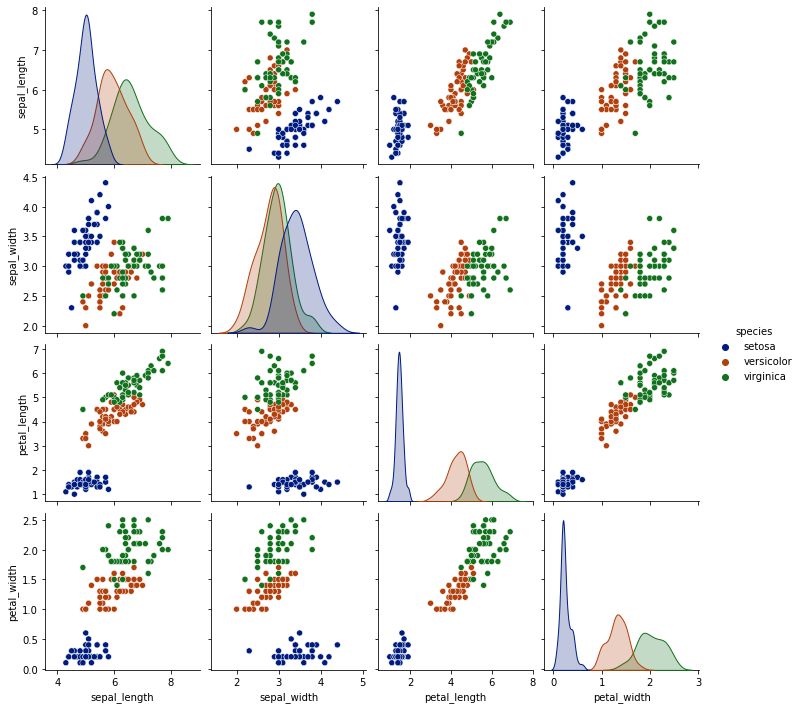

In [4]:
sns.pairplot(data= df, hue= 'species', palette='dark')

### Matriz de covarianza:

1. se realiza un escalamiento de los datos que deseamos analizar.
2. Transponemos la matriz escalada para facilitar su utilización para el calculo de la matriz de correlaciones.
3. Construccion de la matriz de covarianza.


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [42]:
pd.options.display.float_format='{:,.4f}'.format

In [19]:
## primer paso
ss = StandardScaler()
df_scaled = ss.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [24]:
df_scaled = df_scaled.T

In [26]:
covMatrix = np.cov(df_scaled)
covMatrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Visualización de la matriz en un mapa de calor:

Se realiza mediante el grafico `sns.heatmap()` así:

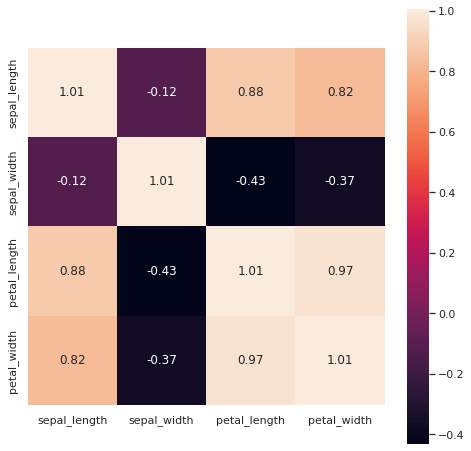

In [39]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
hm1 = sns.heatmap(covMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

Otra forma de hallar tanto la matriz de covarianza como el mapa de calor es mediante el metodo de pandas `.corr()` que se le aplica al dataframe.

In [43]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0000,-0.1176,0.8718,0.8179
sepal_width,-0.1176,1.0000,-0.4284,-0.3661
petal_length,0.8718,-0.4284,1.0000,0.9629
petal_width,0.8179,-0.3661,0.9629,1.0000


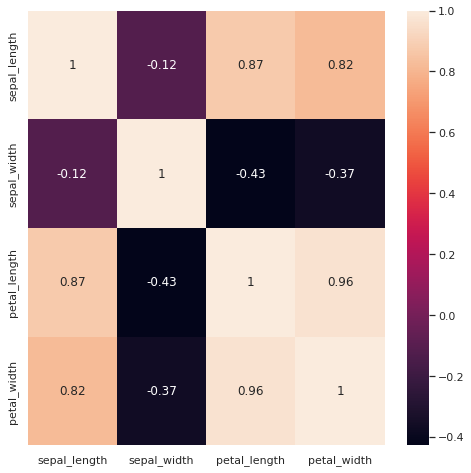

In [44]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
hm = sns.heatmap(df.corr(), annot=True)
